## Linear Regression Demo

In [1]:
import waste_not_the_water
from waste_not_the_water import linear_regression
from waste_not_the_water import nearest_n

/Users/sijiaxiao/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**data_cleaning function in linear_regression module will clean all of unnecessary columns and rows in the original dataset. The function accept no parameters and our dataset is a default in this program. Make sure the data file and this notebook are in the same folder.**

In [2]:
df = linear_regression.data_cleaning()
df.head()

,Capacity,Latitude,LoadEntering,Longitude,NRemoval,PRemoval
0,8000.0,47.77919,6346.0,17.05039,True,True
1,65000.0,47.59491,10032.0,16.64161,True,True
2,42000.0,47.83195,38697.0,16.54416,True,True
3,7250.0,47.82736,3422.0,16.92429,True,True
4,5000.0,48.01208,1351.0,16.99434,True,True


**The following linear_regression_result will return $R^2$ for simple linear regression and ridge regression as well as the filenames that store the training result.**

In [3]:
r2_lr, filename_lr, r2_rr, mse_rr, filename_rr = linear_regression.linear_regression_result()

In [4]:
print('filename:      ', filename_lr, '\t',filename_rr)
print('R^2:           ', r2_lr, '\t',r2_rr)
print('Normalized MSE:', mse_rr)

filename:       linear_result.sav 	 ridge_result.sav
R^2:            0.87506262352 	 0.909523823397
Normalized MSE: 0.0904349573877


**Use customer_inter function to interact with users. This function will take use input and filenames that store the training result as parameters.**

In [5]:
# input customer as a dataframe
import pandas as pd

customer = pd.DataFrame(data = {'LoadEntering': [7000.00], 'Longitude': [15.696], 
                                'Latitude': [51.198], 'NRemoval': [True], 'PRemoval':[True]})
y_customer_lr, y_customer_rr = linear_regression.customer_inter(customer, filename_lr, filename_rr)
print('prediction:    ',y_customer_lr.tolist()[0], '\t',y_customer_rr[0])

prediction:     12004.302326920093 	 6484.94279703


## Nearest Neighbor Demo

**From waste_not_the_water package import nearest_n module**

In [6]:
from waste_not_the_water import nearest_n

**The nearest_n module will search our database to find the most similar plant in latitude, longitude, LoadEntering, NRemoval and PRemoval, for users. The filter condition is based on phosphate and nitrogen removal. This function will give user two returns. One is when phosphate and nitrogen removal condition is statisfied, another is when these two conditions are not all satisfied.**

In [7]:
customer = pd.DataFrame(data = {'LoadEntering': [7000.00], 'Longitude': [15.696], 'Latitude': [51.198],
                                'NRemoval': [True], 'PRemoval':[True]})
df_NP = nearest_n.NP_removal(customer)
df_NP

,Latitude,LoadEntering,Longitude,NRemoval,PRemoval,Capacity
customer,51.198,7000.0,15.696,True,True,NaN
NP-Removal,51.198,7000.0,15.696,True,True,4807.0
NP-nonRemoval,53.707,7000.0,18.175,False,False,12000.0


## Statistics Demo

**This demo will make plots for statistics user may be interested in.**

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# use split_train_test function in linear_regression module to separate train set and test set.
train, test = linear_regression.split_train_test(df)

Text(0.5,1,'Linear Regression')

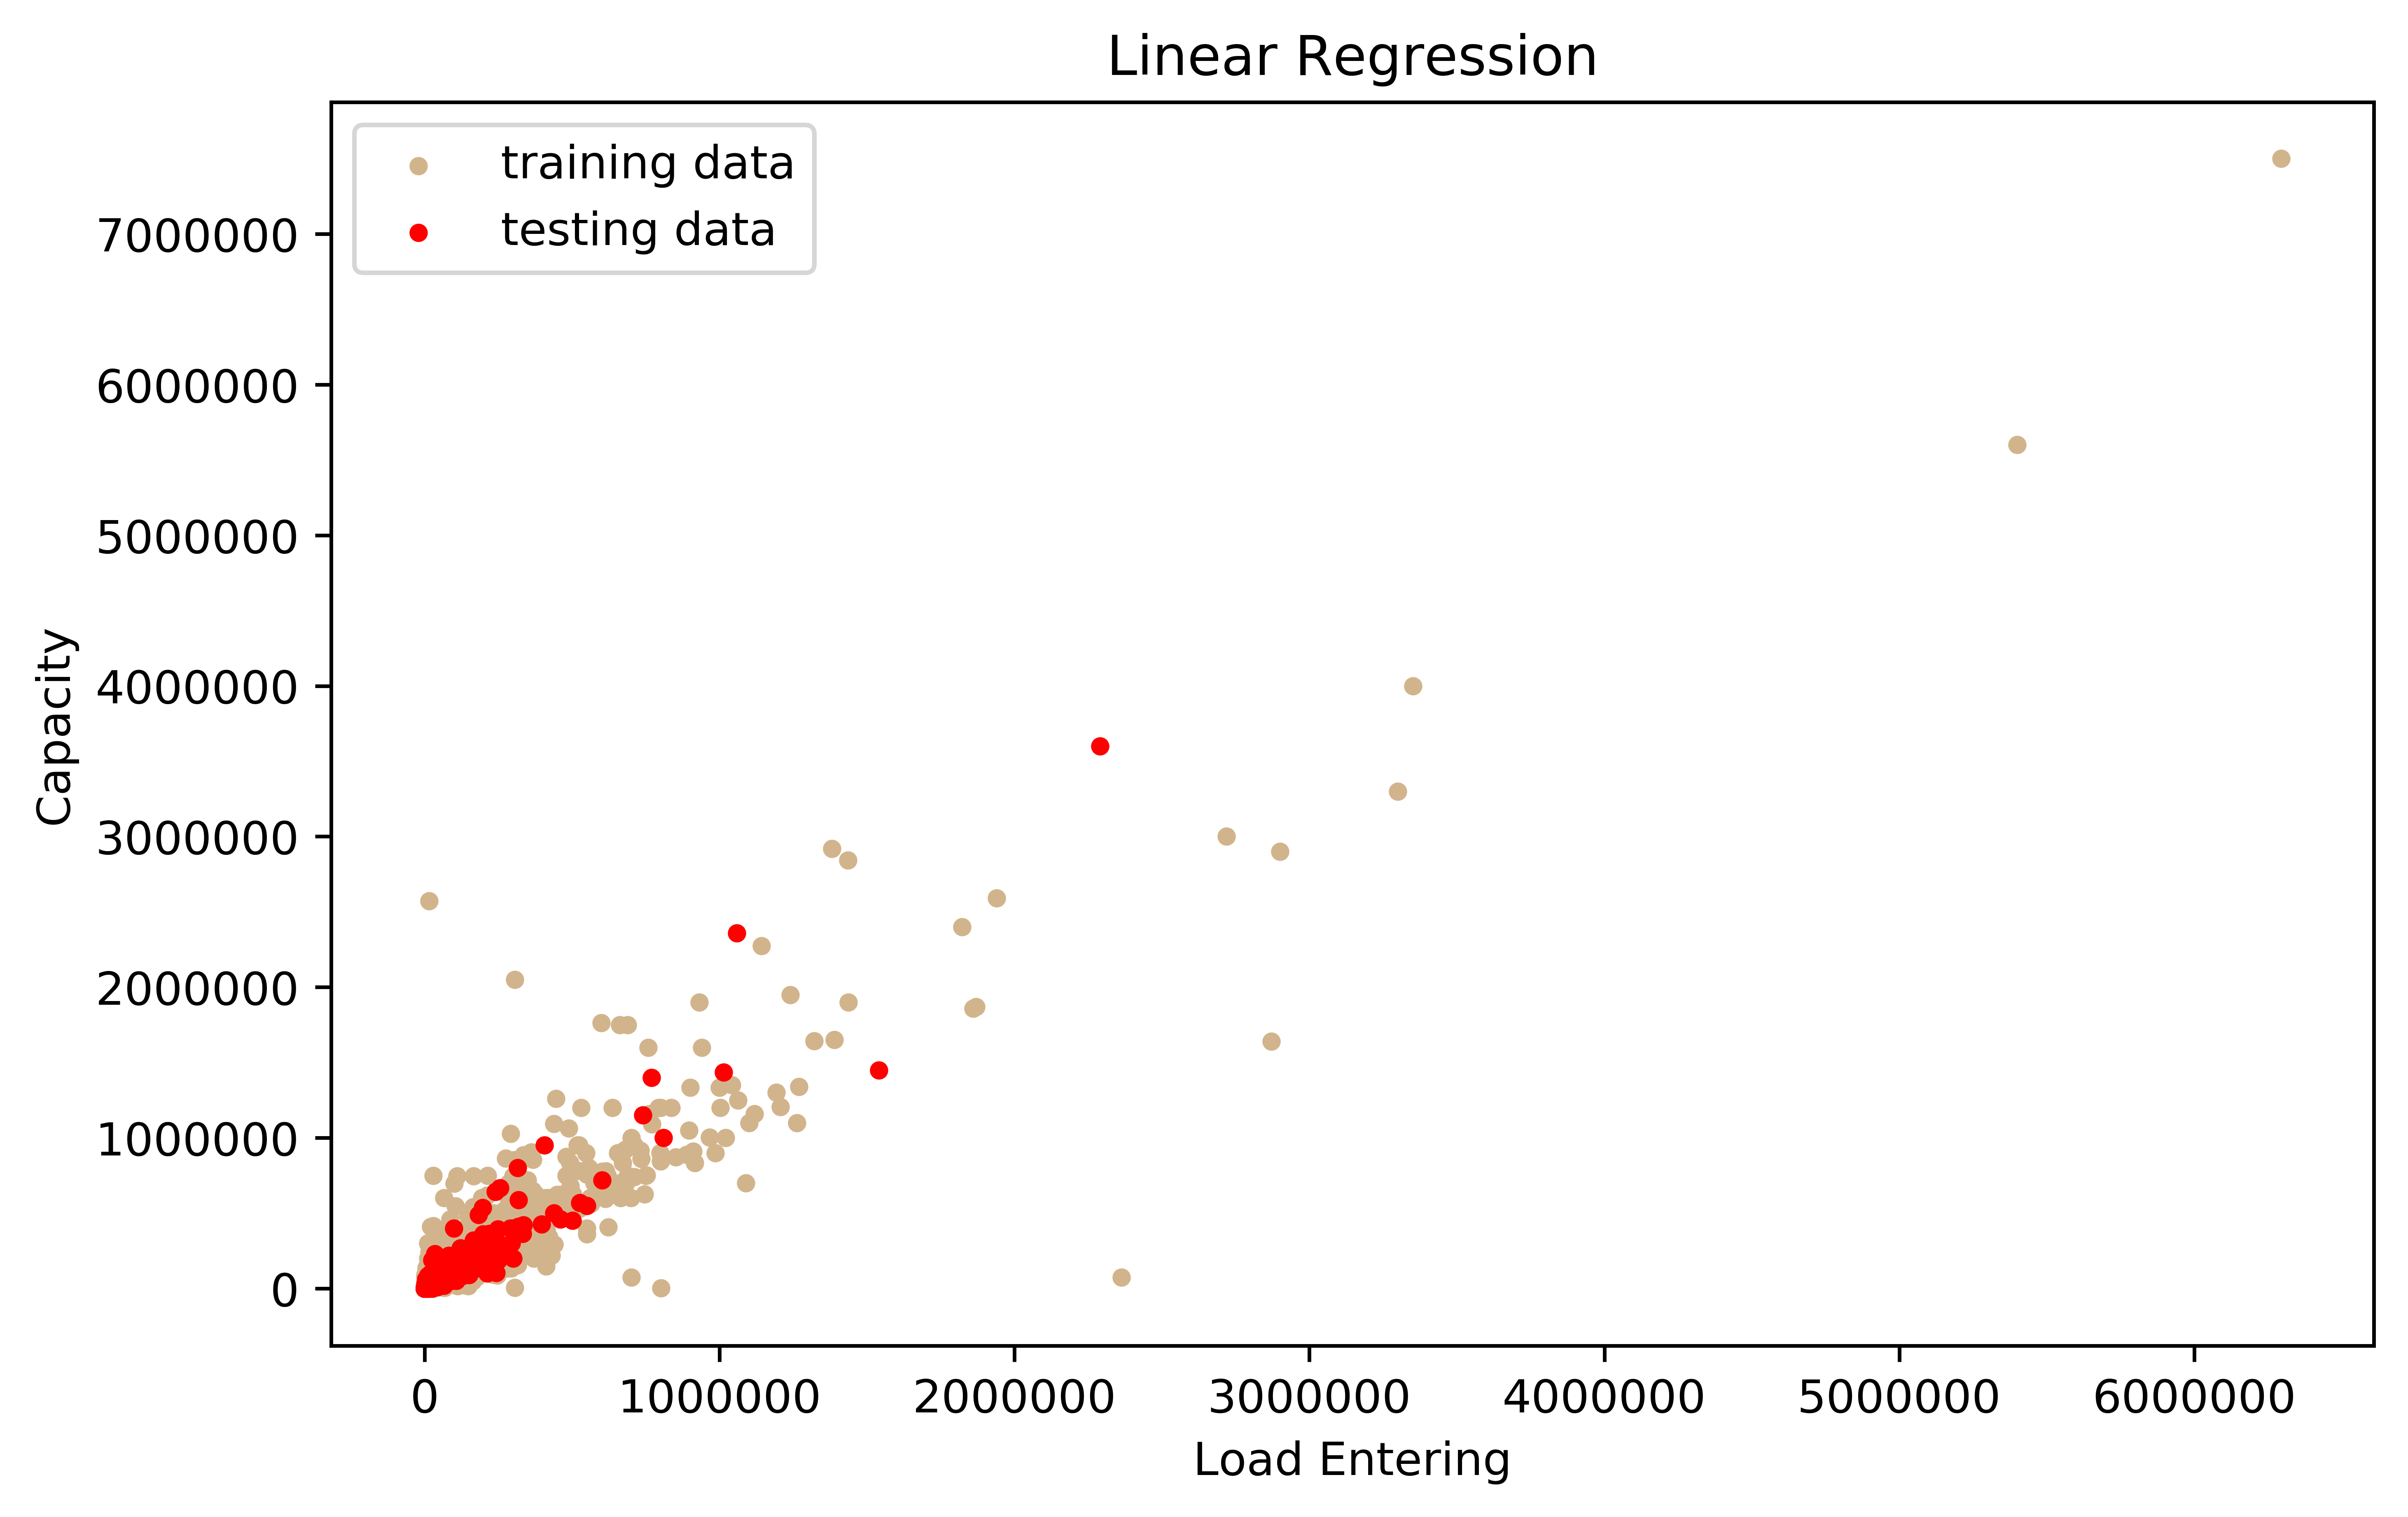

In [10]:
# plot scatter points of training set and testing set
plt.subplots(figsize = (8, 5), dpi = 800)
plt.scatter(train.LoadEntering, train.Capacity, c='tan', marker = '.', label = 'training data')
plt.scatter(test.LoadEntering, test.Capacity, c='r', marker = '.', label = 'testing data')
plt.legend()
plt.xlabel('Load Entering')
plt.ylabel('Capacity')
plt.title('Linear Regression')

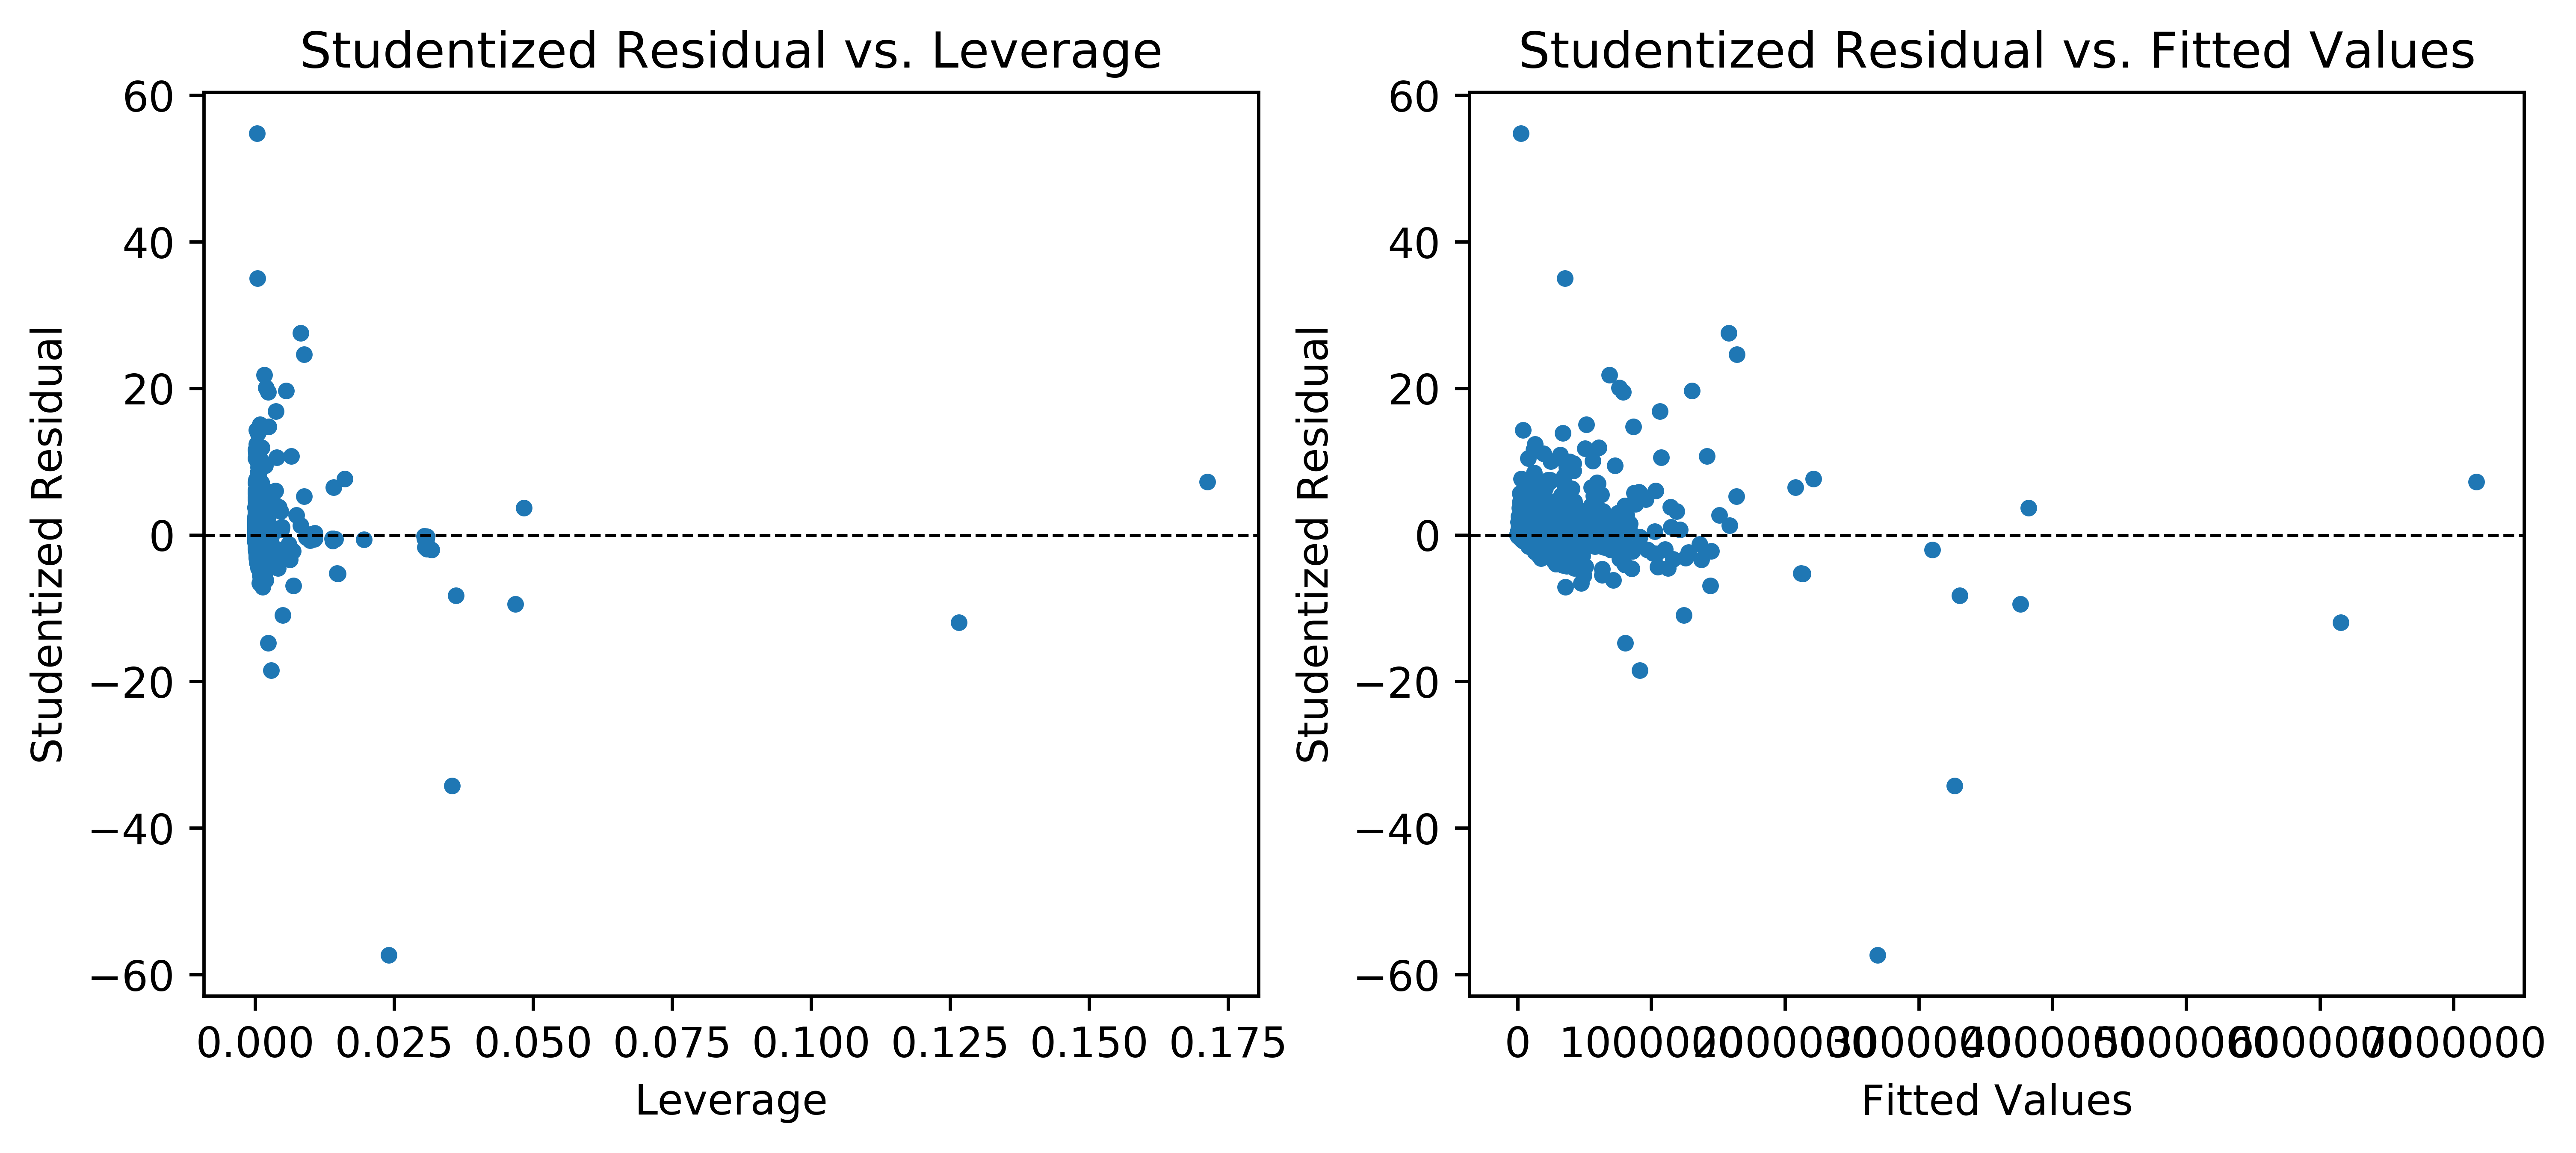

In [11]:
import pickle

# result stores in 'linear_result.sav'
result = pickle.load(open(filename_lr, 'rb'))

# studentized residual and leverage
influence = result.get_influence()
stu_residual = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

# high leverage points
fig, axes = plt.subplots(1, 2, figsize = (10, 4), dpi = 700)
axes[0].scatter(leverage, stu_residual, marker = '.')
axes[0].set_title('Studentized Residual vs. Leverage')
axes[0].set_xlabel('Leverage')
axes[0].set_ylabel('Studentized Residual')
axes[0].axhline(y = 0, ls = '--', linewidth = 0.7, c = 'black')

# outliers
axes[1].scatter(result.predict(), stu_residual, marker='.')
axes[1].set_title('Studentized Residual vs. Fitted Values')
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Studentized Residual')
axes[1].axhline(y = 0, ls = '--', linewidth = 0.7, c = 'black')

**The Stats for ridge regression:**

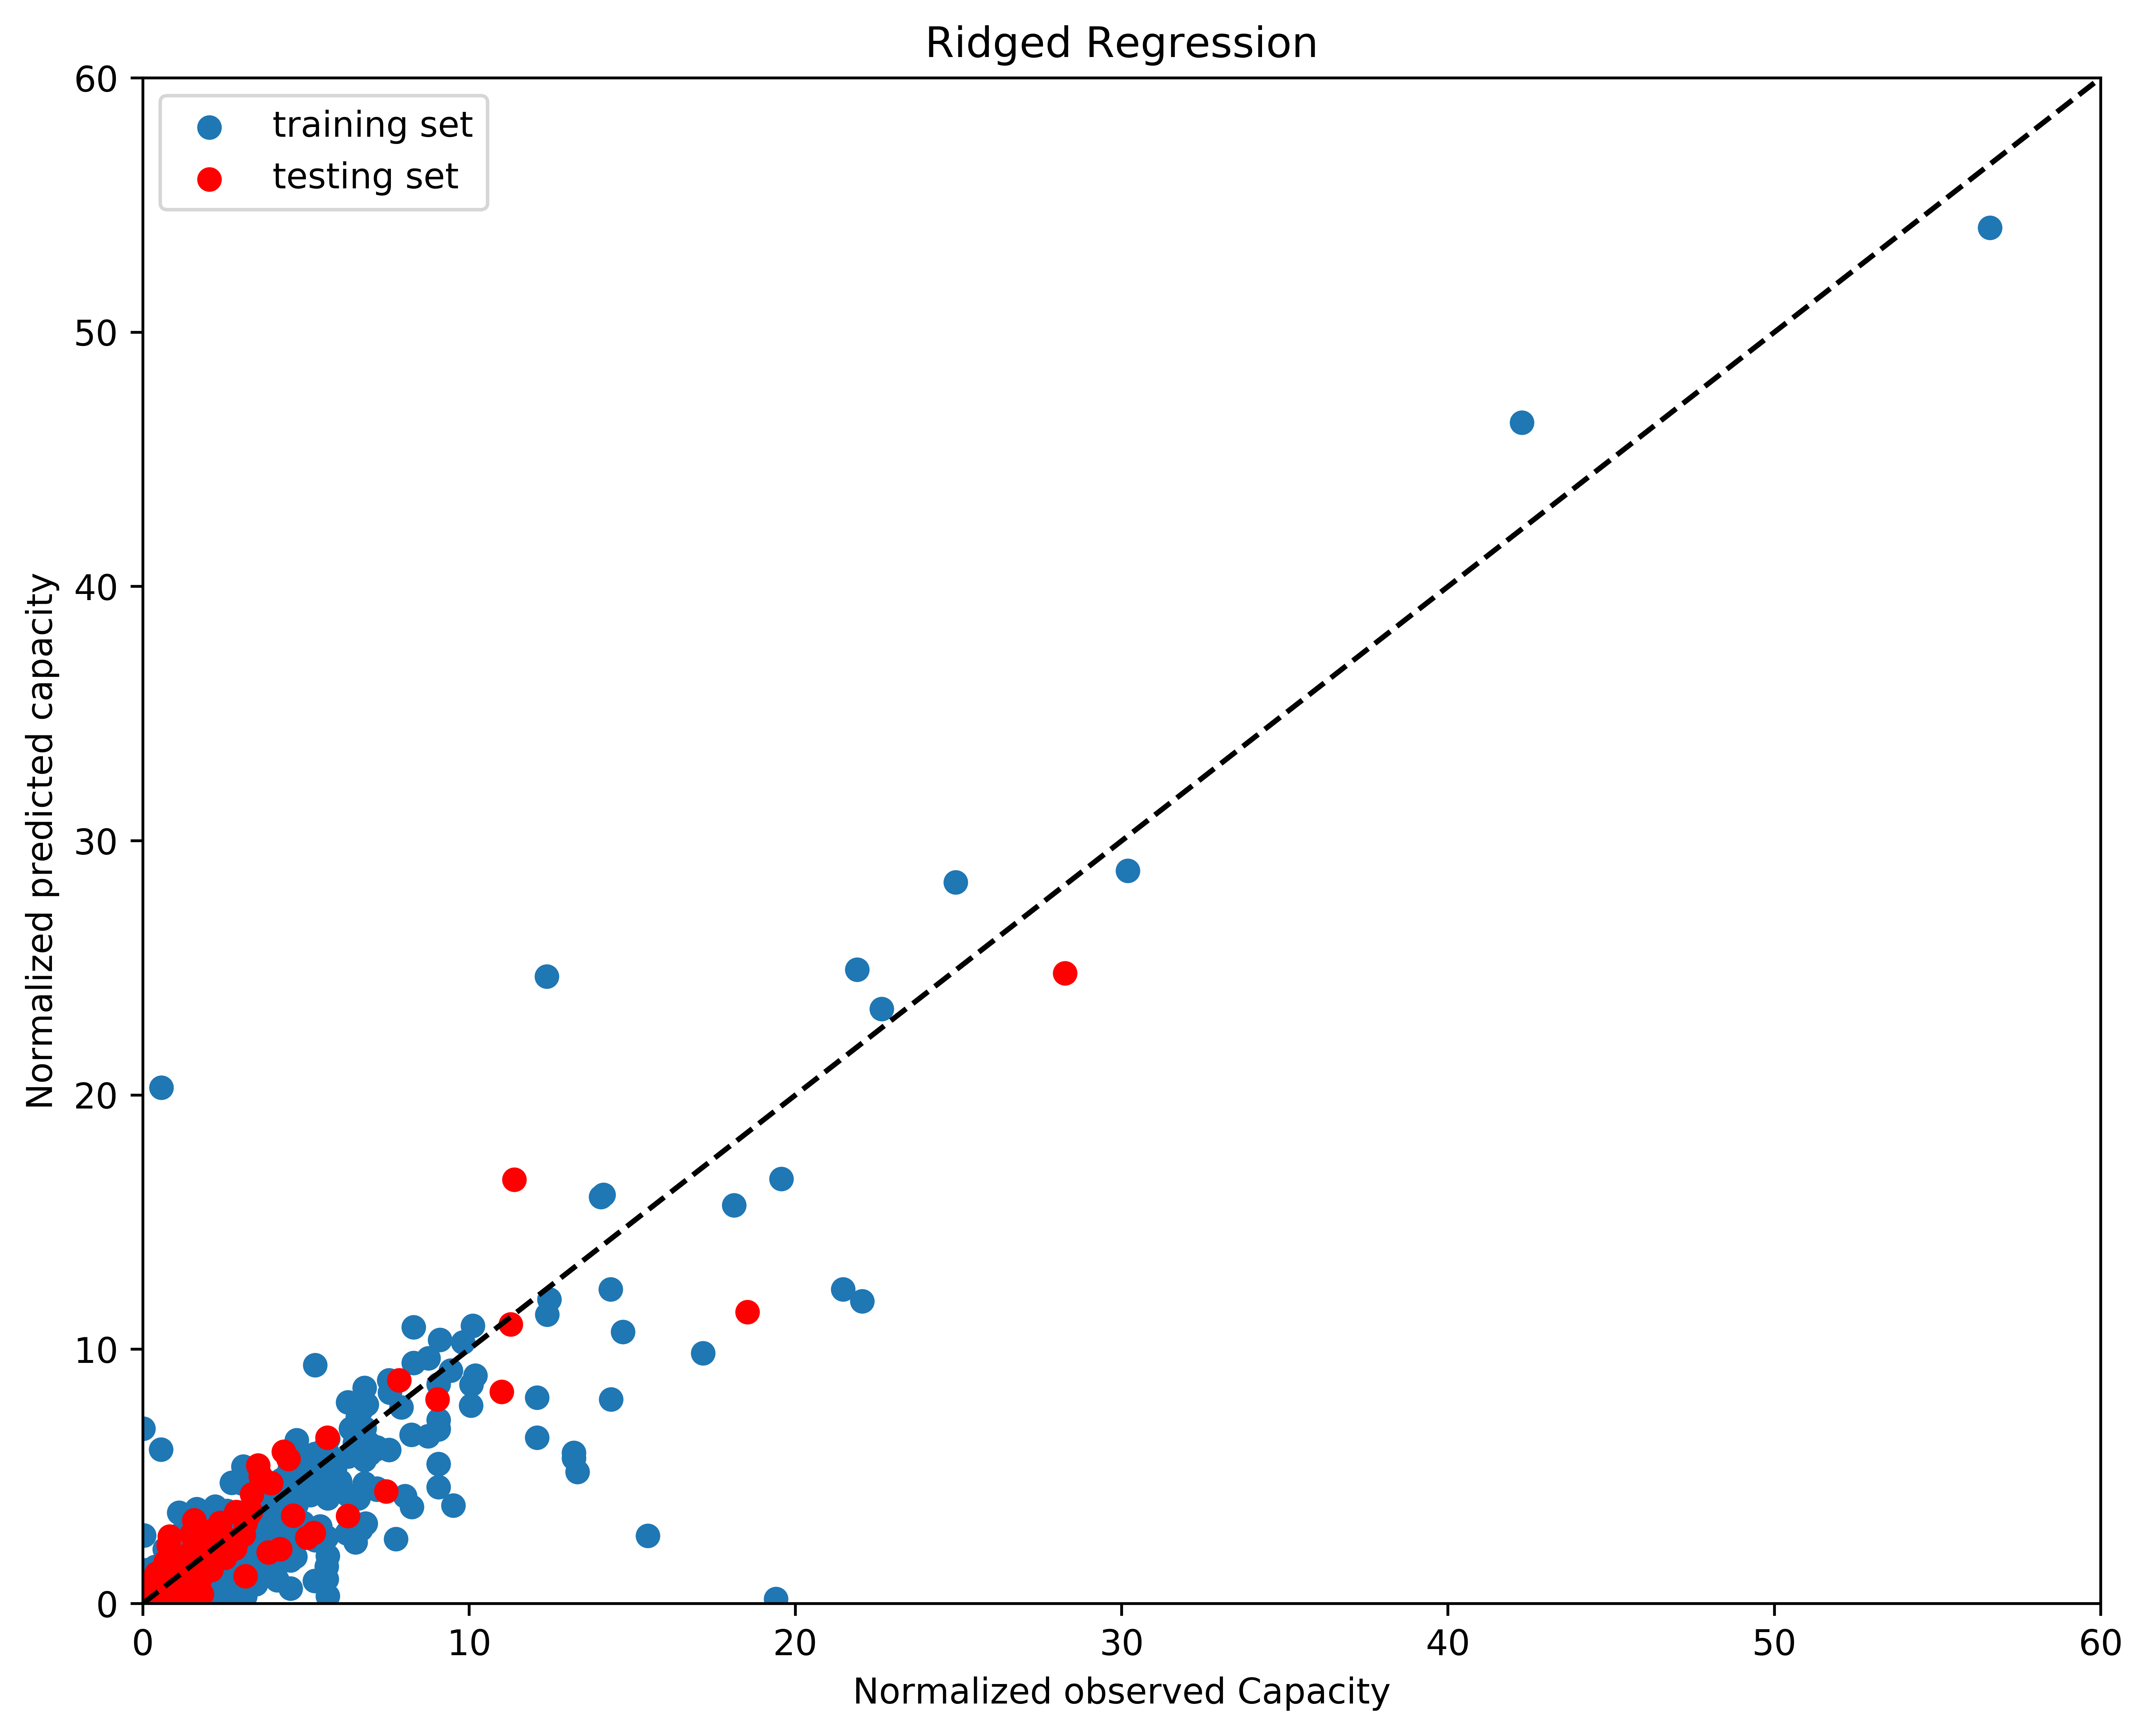

In [12]:
train_normalized = train/train.std()
test_normalized = test/test.std()
heat_ridge = pickle.load(open(filename_rr, 'rb'))

plt.subplots(figsize = (10, 8), dpi =700)
plt.scatter(train_normalized.Capacity,heat_ridge.predict(train_normalized[['Latitude','LoadEntering','Longitude']]),
           label='training set')
plt.scatter(test_normalized.Capacity,heat_ridge.predict(test_normalized[['Latitude','LoadEntering','Longitude']])
            , c='r', label='testing set')
plt.plot([0,60], [0, 60], c='black',ls='--')
plt.xlabel('Normalized observed Capacity')
plt.ylabel('Normalized predicted capacity')
plt.title('Ridged Regression')
plt.xlim((0, 60))
plt.ylim((0, 60))
plt.legend()